# (06) Gradients -- Cos

**Motivation**: Using cosine similarity as affinity measure. <br>

In [1]:
# HIDE CODE


import os, sys
from IPython.display import display, Latex

# tmp & extras dir
git_dir = os.path.join(os.environ['HOME'], 'Dropbox/git')
extras_dir = os.path.join(git_dir, 'jb-Ca-fMRI/_extras')
fig_base_dir = os.path.join(git_dir, 'jb-Ca-fMRI/figs')
tmp_dir = os.path.join(git_dir, 'jb-Ca-fMRI/tmp')

# GitHub
sys.path.insert(0, os.path.join(git_dir, '_Ca-fMRI'))
from figures.fighelper import *
from analysis.final import *
from utils.render import *

# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
from tqdm.notebook import tqdm
%matplotlib inline
set_style()

In [2]:
# HIDE CODE


def default_props_anesth(
        num_k: int = 7,
        perc: int = 15,
        **kwargs, ):
    mice = Mice(512)
    mice.set_kws(
        desc_ca2='preproc',
        desc_bold='rabies-hp',
    )
    props_base = {
        'mice': mice,
        'num_k': num_k,
        'task': 'rest',
        'perc': f'p{perc}-sample',
        'metric': 'pearson',
        'sv_props': {
            'match_using': 'gam',
            'match_metric': 'euclidean'},
        'graph_type': 'real',
        'kw_kmeans': {'n_init': 100},
        'verbose': False,
    }
    kwargs = setup_kwargs(props_base, kwargs)
    props_ca = {'mode': 'ca2', **kwargs}
    return mice, props_ca

## Prep

In [3]:
mice = Mice(512)
bs = Base(mice, mode='ca2')
kws_show = show_kws(7)

pal = prepare_palette()
translation = {'BOLD': BOLD, 'CAS': CAS, 'CAF': CAF}

fig_dir = pjoin(fig_base_dir, 'rebuttal')
print(fig_dir)

/home/hadi/Dropbox/git/jb-Ca-fMRI/figs/rebuttal

## Load adjacencies

In [4]:
# adj, _ = collect_adjacencies(mice, 'bold-lite')
mice.set_kws(band_bold=(0.01, 0.5), desc_bold='rabies-hp')
a, _ = collect_adjacencies(mice, 'bold-lite', 1.0)
z = bn.nanmean(np.arctanh(a), 0)
r = np.tanh(z)

## Grads

In [5]:
sys.path.insert(0, os.path.join(git_dir, 'mapalign'))
from mapalign import embed

In [94]:
r_fill = np.nan_to_num(r)
norms = np.linalg.norm(r_fill, axis=1, keepdims=True)
affinity = (r_fill @ r_fill.T) / (norms @ norms.T)
# affinity = (1 + affinity) / 2
affinity[affinity < 0.0] = 0.0

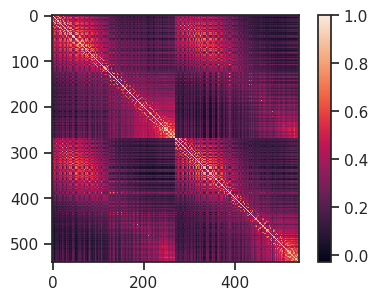

In [95]:
plt.imshow(affinity)
plt.colorbar();

<Axes: ylabel='Count'>

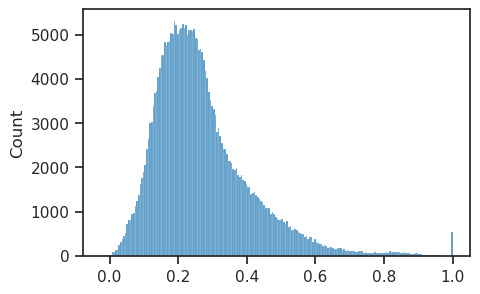

In [96]:
sns.histplot(affinity.ravel())

In [98]:
embedding_results, embedding_dict = embed.compute_diffusion_map(
    affinity, n_components=540, return_result=True)
embedding_results = embedding_results.T

In [105]:
lamb = embedding_dict['lambdas']
lamb /= lamb.sum()
lamb *= 100

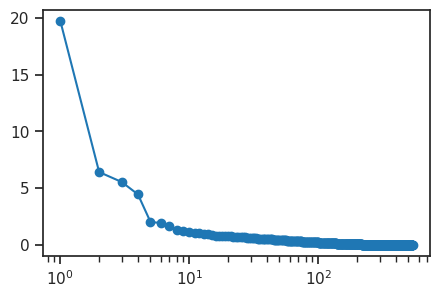

In [108]:
fig, ax = create_figure()
plt.plot(range(1, len(lamb) + 1), lamb, marker='o')
ax.set_xscale('log');

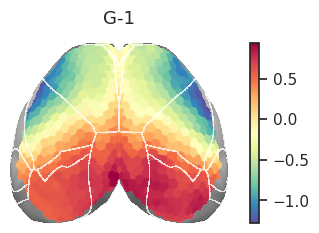

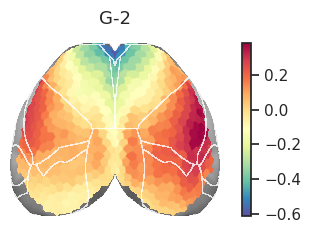

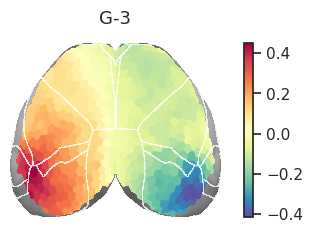

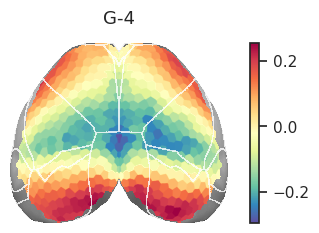

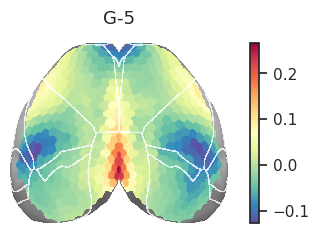

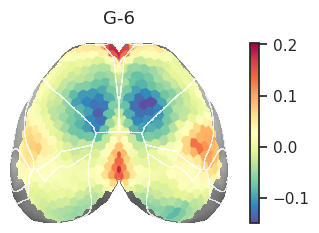

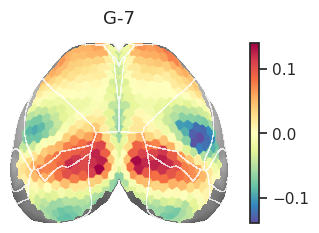

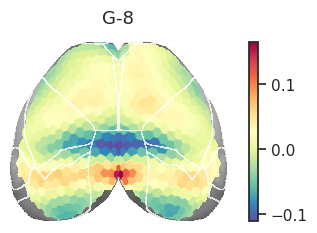

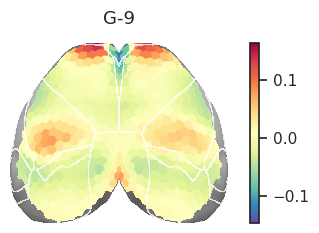

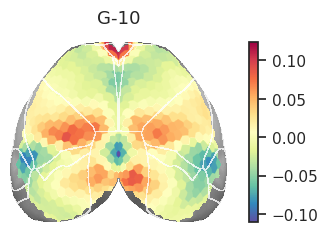

In [110]:
for i in range(10):
    bs.show(
        embedding_results[i],
        vmin=None,
        vmax=None,
        figsize=(5, 2.5),
        titles=[f"G-{i+1}"],
        cbar=True,
        cmap='Spectral_r',
    );